## EDA: Listas de usuarios
####
##### A continuación importamos las librerías que utilizaremos para el análisis.

In [2]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup as bs
import random
import time
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

##### Abrimos un archivo pickle que contiene las listas de reviews de una parte de los usuarios de MAL.

In [4]:
with open('../demo Victor/data/listas_usuarios_5.pickle', "rb") as archivo:
    listas = pickle.load(archivo)

##### Luego generamos el DataFrame que contendrá todas las listas de calificaciones de cada usuario con un índice que corresponderá a los anime_ids.

In [5]:
gran_df = pd.DataFrame()
for user_id, value in listas.items():
    name = value.pop("nombre")
    value = {x[0]: x[1][0] for x in value.items() if (x[1][1] == 2) and (x[1][0] > 0)}
    if len(value) == 0:
        continue
    dato = {f"{user_id}:{name}": value}
    dato_df = pd.DataFrame.from_dict(dato, orient='columns')
    gran_df = pd.concat([gran_df, dato_df], axis=1)

In [6]:
# Desplegamos el DataFrame
pd.set_option('display.max_rows', 100)
gran_df

,3754155:Kazaaj,4250973:orhanoror,4083845:Clowneater,4005687:tintin_anime,4182671:jyeoul,3554097:Drackulis,3512535:lopmon,3855241:LulubellNoah,4094111:enzothebest,4283379:gucio18911,...,4228955:kainoa13912,4035465:iDuk,4090723:Richaross,3784149:RandomForever,4038015:Cherry12,3918423:yamanotesen,4073061:PKFanop,4144855:beckachu,3726901:Panzerx,3511913:kstinasunflower
30,7.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
47,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
15785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [7]:
gran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: float64(578)
memory usage: 20.9 MB


In [8]:
gran_df_sparse = gran_df.astype(pd.SparseDtype(np.float64, fill_value=np.nan))

In [ ]:
gran_df_sparse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 30 to 696
Columns: 578 entries, 3754155:Kazaaj to 3511913:kstinasunflower
dtypes: Sparse[float64, nan](578)
memory usage: 627.8 KB


##### Al tener un conjunto de datos grandes con muchos valores nulos, para poder ahorrar memoria realizamos una conversión del DataFrame 'gran_df' a 'gran_df_sparse' utilizando el tipo de datos dispersos de Pandas. Aprovechando así la capacidad de los tipos de datos dispersos para manejar eficientemente este conjunto.
####
####

In [9]:
# Eliminamos 'gran_df' para liberar memoria

del gran_df

##### A continuación creamos un histograma con los valores del DataFrame 'gran_df_sparse' con el objetivo de visualizar como se distribuyen las calificaciones e intentar identificar patrones o tendencias.

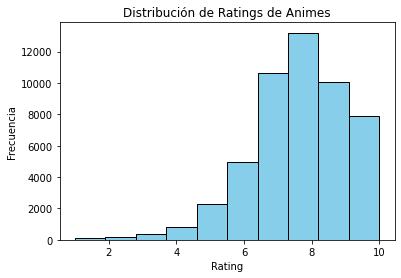

In [10]:
plt.hist(gran_df_sparse.values.flatten(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings de Animes')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

In [101]:
animes_vistos_por_usuario = gran_df_sparse.notnull().sum(axis=0)
animes_vistos_por_usuario

3754155:Kazaaj              56
4250973:orhanoror          446
4083845:Clowneater           5
4005687:tintin_anime        66
4182671:jyeoul              13
                          ... 
3918423:yamanotesen         42
4073061:PKFanop             36
4144855:beckachu             3
3726901:Panzerx              1
3511913:kstinasunflower     27
Length: 578, dtype: int32

In [92]:
promedio_calificaciones = gran_df_sparse.mean(axis=0, skipna=True)
promedio_calificaciones

3754155:Kazaaj              5.660714
4250973:orhanoror           7.813901
4083845:Clowneater          7.400000
4005687:tintin_anime        7.939394
4182671:jyeoul              8.384615
                             ...    
3918423:yamanotesen         7.166667
4073061:PKFanop             7.555556
4144855:beckachu            9.666667
3726901:Panzerx            10.000000
3511913:kstinasunflower     8.592593
Length: 578, dtype: float64

In [106]:
dispersion_calificaciones = gran_df_sparse.sparse.to_dense().std(axis=0, skipna=True)
dispersion_calificaciones

3754155:Kazaaj             1.687136
4250973:orhanoror          1.172296
4083845:Clowneater         2.701851
4005687:tintin_anime       1.634990
4182671:jyeoul             1.120897
                             ...   
3918423:yamanotesen        1.885977
4073061:PKFanop            1.157447
4144855:beckachu           0.577350
3726901:Panzerx                 NaN
3511913:kstinasunflower    1.083416
Length: 578, dtype: float64

In [ ]:
rango_animes_vistos = [0, 50, 100, 150]
rango_promedio_calificaciones = [0, 5, 7, 10]
rango_dispersion_calificaciones = [0, 2, 4]